# Computer Vision using CNNs


In [1]:
import os
import sys
import sklearn
import tensorflow as tf
from tensorflow import keras
import numpy as np
# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "cnn"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
def plot_image(image):
    plt.imshow(image, cmap="gray", interpolation="nearest")
    plt.axis("off")

def plot_color_image(image):
    plt.imshow(image, interpolation="nearest")
    plt.axis("off")

# What is a Convolution ?

A convolution is the simple application of a filter to an input that results in an activation. Repeated application of the same filter to an input results in a map of activations called a feature map, indicating the locations and strength of a detected feature in an input, such as an image.

The most important building block of a CNN is the convolutional layer: neurons in
the first convolutional layer are not connected to every single pixel in the input image as happenes in a Dense layer for instance, but only to pixels in their receptive fields. Similarly, each neuron in the second convolutional layer is connected only to neurons located within a small rectangle in the first layer.

This architecture allows the network to concentrate on small low-level features in the
first hidden layer, then assemble them into larger higher-level features in the next
hidden layer, and so on. This hierarchical structure is common in real-world images,
which is one of the reasons why CNNs work so well for image recognition.

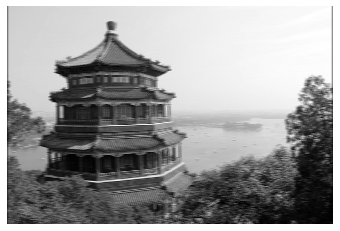

In [3]:
import numpy as np
from PIL import Image
from sklearn.datasets import load_sample_image

# Load sample images
china = load_sample_image("china.jpg") / 255
flower = load_sample_image("flower.jpg") / 255
images = np.array([china, flower])
batch_size, height, width, channels = images.shape

# Create 2 filters
filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)
filters[:, 3, :, 0] = 1  # vertical line
filters[3, :, :, 1] = 1  # horizontal line

outputs = tf.nn.conv2d(images, filters, strides=1, padding="SAME")

plt.imshow(outputs[0, :, :, 1], cmap="gray") # plot 1st image's 2nd feature map
plt.axis("off") # Not shown in the book
plt.show()

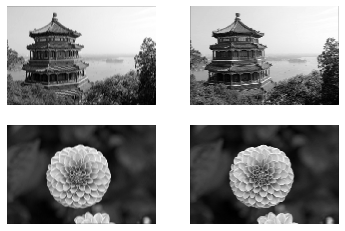

In [4]:
for image_index in (0, 1):
    for feature_map_index in (0, 1):
        plt.subplot(2, 2, image_index * 2 + feature_map_index + 1)
        plot_image(outputs[image_index, :, :, feature_map_index])

plt.show()

## Crop images

In [5]:
def crop(images):
    return images[150:220, 130:250]

Saving figure china_original


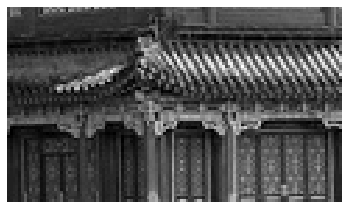

Saving figure china_vertical


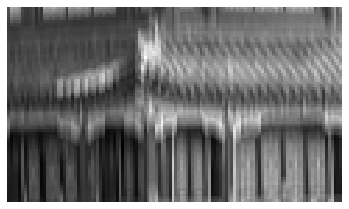

Saving figure china_horizontal


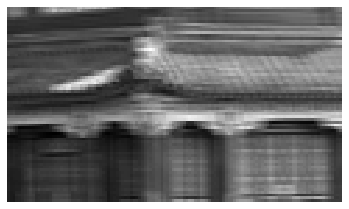

In [6]:
plot_image(crop(images[0, :, :, 0]))
save_fig("china_original", tight_layout=False)
plt.show()

for feature_map_index, filename in enumerate(["china_vertical", "china_horizontal"]):
    plot_image(crop(outputs[0, :, :, feature_map_index]))
    save_fig(filename, tight_layout=False)
    plt.show()

# What are the filters in a CNN?
A convolution is a linear operation that involves the multiplication of a set of weights with the input, much like a traditional neural network. The multiplication is performed between an array of input data and a two-dimensional array of weights, called a filter or a kernel.

The filter is smaller than the input data and the type of multiplication applied between a filter-sized patch of the input and the filter is a dot product. A dot product is the element-wise multiplication between the filter-sized patch of the input and filter, which is then summed, always resulting in a single value. Because it results in a single value, the operation is often referred to as the “scalar product“.

### For example:
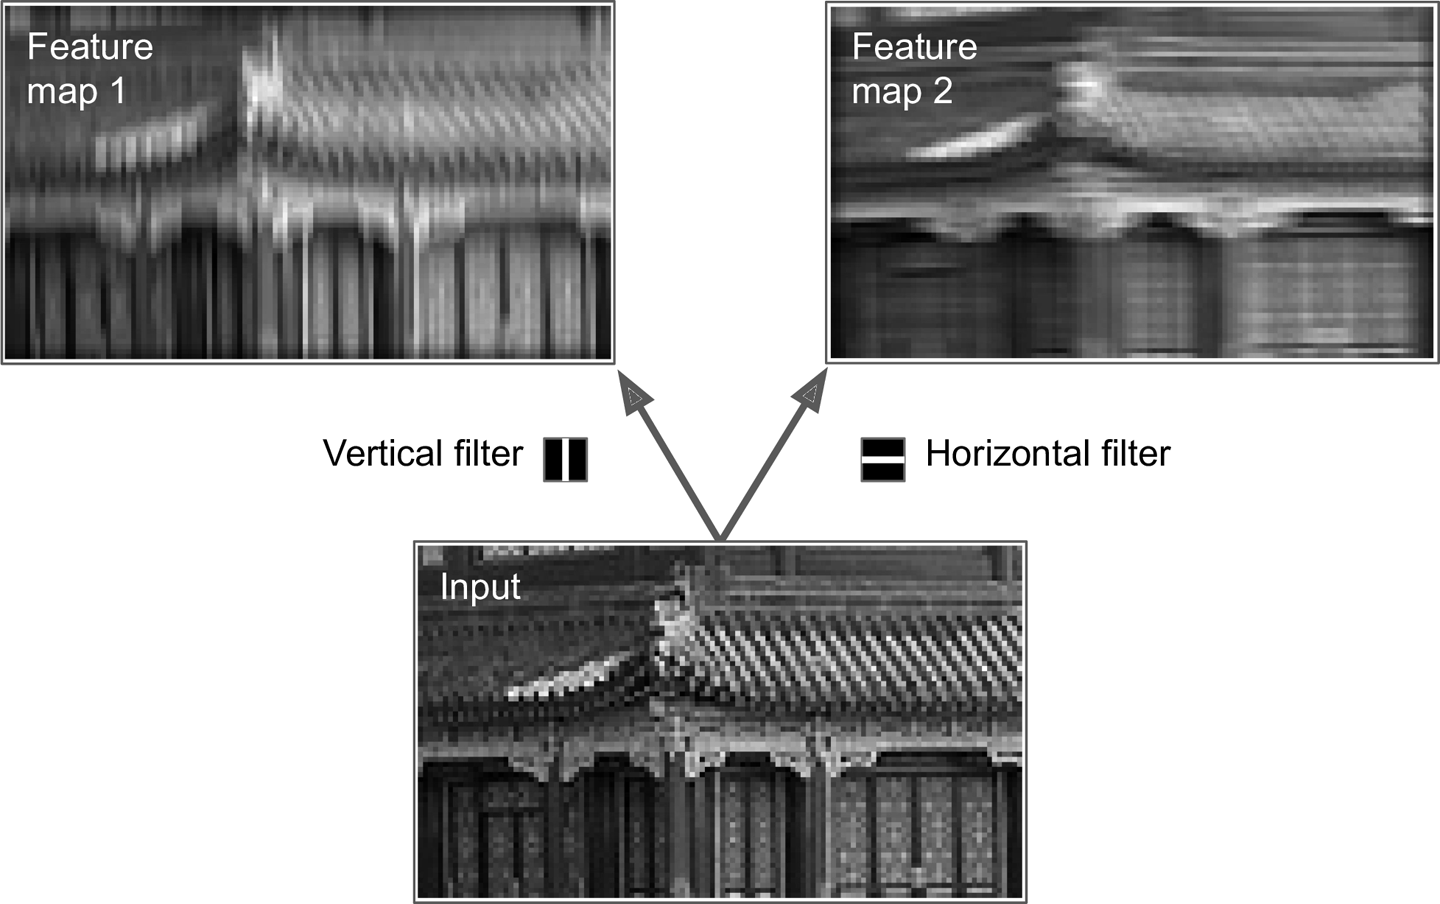

## Plot image filters


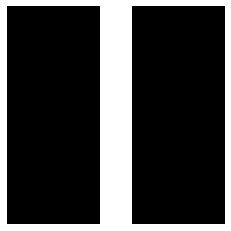

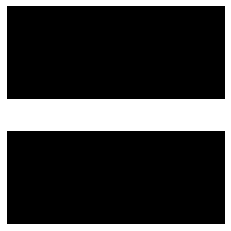

In [7]:
plot_image(filters[:, :, 0, 0])
plt.show()
plot_image(filters[:, :, 0, 1])
plt.show()

# Convolutional layer using Keras

In [8]:
conv = keras.layers.Conv2D(filters=32, kernel_size=3, strides=1,
                           padding="SAME", activation="relu")

#### to do...
* What is padding
* What is activation
    * Relu
    * Sigmoid
    * tanh, etc
* How to choose between them